**Instalando Pygrib**

In [1]:
!pip install -q pygrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 31.9 MB/s eta 0:00:00


**Importando bibliotecas**

In [2]:
import pygrib
import xarray as xr
import numpy as np

**Baixando e lendo o arquivo GRIB**

In [3]:
# limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# selecina a extensão da imagem [min. lon, min. lat, max. lon, max. lat]
extent = [lonmin, latmin, lonmax, latmax]

# baixo arquivo do MERGE
!wget  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/01/MERGE_CPTEC_20230101.grib2

# leitura do arquivo grib
grib = pygrib.open('/content/MERGE_CPTEC_20230101.grib2')

# lendo o campo do modelo
grb = grib.select(name='Precipitation')[0]

# extrai os dados para uma área específica
precip_grib, lats_grib, lons_grib = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

--2024-04-12 20:13:46--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/01/MERGE_CPTEC_20230101.grib2
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433820 (424K)
Saving to: ‘MERGE_CPTEC_20230101.grib2’

MERGE_CPTEC_2023010 100%[===================>] 423.65K   350KB/s    in 1.2s    

2024-04-12 20:13:49 (350 KB/s) - ‘MERGE_CPTEC_20230101.grib2’ saved [433820/433820]



**Informações da matriz de dados**

In [4]:
# quantidade de colunas e linhas da matriz
nx, ny = precip_grib.shape[1], precip_grib.shape[0]

# resolução espacial em graus da lat e lon (=0.01 graus)
dx = (lonmax-lonmin)/(nx-1)
dy = (latmax-latmin)/(ny-1)

# usado para transformar de binário para netcdf
# lats = np.linspace(latmin, latmax, ny)
# lons = np.linspace(lonmin, lonmax, nx)
lats = lats_grib[:,0]
lons = ((lons_grib[0,:] + 180) % 360) - 180 # transforma as longitudes de 0/360 para -180/180

In [5]:
lats_grib.shape

(420, 420)

In [6]:
lats_grib[:,0]

array([-34.95, -34.85, -34.75, -34.65, -34.55, -34.45, -34.35, -34.25,
       -34.15, -34.05, -33.95, -33.85, -33.75, -33.65, -33.55, -33.45,
       -33.35, -33.25, -33.15, -33.05, -32.95, -32.85, -32.75, -32.65,
       -32.55, -32.45, -32.35, -32.25, -32.15, -32.05, -31.95, -31.85,
       -31.75, -31.65, -31.55, -31.45, -31.35, -31.25, -31.15, -31.05,
       -30.95, -30.85, -30.75, -30.65, -30.55, -30.45, -30.35, -30.25,
       -30.15, -30.05, -29.95, -29.85, -29.75, -29.65, -29.55, -29.45,
       -29.35, -29.25, -29.15, -29.05, -28.95, -28.85, -28.75, -28.65,
       -28.55, -28.45, -28.35, -28.25, -28.15, -28.05, -27.95, -27.85,
       -27.75, -27.65, -27.55, -27.45, -27.35, -27.25, -27.15, -27.05,
       -26.95, -26.85, -26.75, -26.65, -26.55, -26.45, -26.35, -26.25,
       -26.15, -26.05, -25.95, -25.85, -25.75, -25.65, -25.55, -25.45,
       -25.35, -25.25, -25.15, -25.05, -24.95, -24.85, -24.75, -24.65,
       -24.55, -24.45, -24.35, -24.25, -24.15, -24.05, -23.95, -23.85,
      

In [7]:
lons_grib[0,:]

array([285.05, 285.15, 285.25, 285.35, 285.45, 285.55, 285.65, 285.75,
       285.85, 285.95, 286.05, 286.15, 286.25, 286.35, 286.45, 286.55,
       286.65, 286.75, 286.85, 286.95, 287.05, 287.15, 287.25, 287.35,
       287.45, 287.55, 287.65, 287.75, 287.85, 287.95, 288.05, 288.15,
       288.25, 288.35, 288.45, 288.55, 288.65, 288.75, 288.85, 288.95,
       289.05, 289.15, 289.25, 289.35, 289.45, 289.55, 289.65, 289.75,
       289.85, 289.95, 290.05, 290.15, 290.25, 290.35, 290.45, 290.55,
       290.65, 290.75, 290.85, 290.95, 291.05, 291.15, 291.25, 291.35,
       291.45, 291.55, 291.65, 291.75, 291.85, 291.95, 292.05, 292.15,
       292.25, 292.35, 292.45, 292.55, 292.65, 292.75, 292.85, 292.95,
       293.05, 293.15, 293.25, 293.35, 293.45, 293.55, 293.65, 293.75,
       293.85, 293.95, 294.05, 294.15, 294.25, 294.35, 294.45, 294.55,
       294.65, 294.75, 294.85, 294.95, 295.05, 295.15, 295.25, 295.35,
       295.45, 295.55, 295.65, 295.75, 295.85, 295.95, 296.05, 296.15,
      

In [8]:
((lons_grib[0,:] + 180) % 360) - 180

array([-74.95, -74.85, -74.75, -74.65, -74.55, -74.45, -74.35, -74.25,
       -74.15, -74.05, -73.95, -73.85, -73.75, -73.65, -73.55, -73.45,
       -73.35, -73.25, -73.15, -73.05, -72.95, -72.85, -72.75, -72.65,
       -72.55, -72.45, -72.35, -72.25, -72.15, -72.05, -71.95, -71.85,
       -71.75, -71.65, -71.55, -71.45, -71.35, -71.25, -71.15, -71.05,
       -70.95, -70.85, -70.75, -70.65, -70.55, -70.45, -70.35, -70.25,
       -70.15, -70.05, -69.95, -69.85, -69.75, -69.65, -69.55, -69.45,
       -69.35, -69.25, -69.15, -69.05, -68.95, -68.85, -68.75, -68.65,
       -68.55, -68.45, -68.35, -68.25, -68.15, -68.05, -67.95, -67.85,
       -67.75, -67.65, -67.55, -67.45, -67.35, -67.25, -67.15, -67.05,
       -66.95, -66.85, -66.75, -66.65, -66.55, -66.45, -66.35, -66.25,
       -66.15, -66.05, -65.95, -65.85, -65.75, -65.65, -65.55, -65.45,
       -65.35, -65.25, -65.15, -65.05, -64.95, -64.85, -64.75, -64.65,
       -64.55, -64.45, -64.35, -64.25, -64.15, -64.05, -63.95, -63.85,
      

**Gerando DataSet**

In [9]:
# gerando dataset em formato netcdf
data_vars = {'rain':(('lat', 'lon'), precip_grib, {'units': 'mm/dia', 'long_name':'precipitação diária do MERGE'})}
coords = {'lat': lats, 'lon': lons}
ds = xr.Dataset(data_vars=data_vars, coords=coords)

# salva arquivo NETCDF
ds.to_netcdf('/content/MERGE_CPTEC_20230101.nc')

# mostra o dado
ds

<xarray.Dataset>
Dimensions:  (lat: 420, lon: 420)
Coordinates:
  * lat      (lat) float64 -34.95 -34.85 -34.75 -34.65 ... 6.65 6.75 6.85 6.95
  * lon      (lon) float64 -74.95 -74.85 -74.75 -74.65 ... -33.25 -33.15 -33.05
Data variables:
    rain     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 110.0 95.12 6.5 10.5

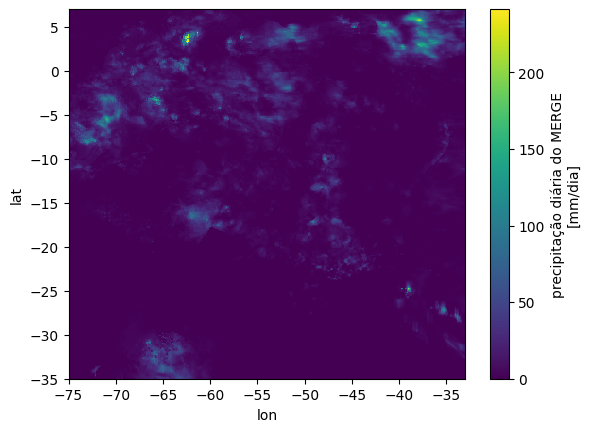

In [10]:
# plota imagem
ds['rain'].plot()